In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.datasets import fetch_openml, fetch_20newsgroups
from torchvision.datasets import CIFAR10, CIFAR100
from torch.utils.data import DataLoader
from torchvision import transforms

import sys
import os
from typing import Tuple

sys.path.append('/home/danillorp/Área de Trabalho/github/fema/src/')

from fema_clustering import FEMaClustering
import matplotlib.pyplot as plt


In [2]:
# Função para carregar e preparar os datasets

def load_datasets():
    # Carregar datasets do sklearn
    print('Loading dataset Iris ...')
    iris = datasets.load_iris()
    print('Loading dataset Wine ...')
    wine = datasets.load_wine()
    print('Loading dataset Digits ...')
    digits = datasets.load_digits()
    
    # Carregar MNIST
    """
    print('Loading dataset MNIST ...')
    mnist = fetch_openml('mnist_784', version=1)
    mnist_data = mnist.data
    mnist_target = mnist.target.astype(int)
    
    # Carregar KDD Cup 99
    print('Loading dataset KDDCup99 ...')
    kddcup = fetch_openml('KDDCup99', version=1)
    kddcup_data = kddcup.data
    kddcup_target = kddcup.target

    # Carregar CIFAR-10
    print('Loading dataset CIFAR-10 ...')
    transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])
    cifar10 = CIFAR10(root='./data', train=True, download=True, transform=transform)
    cifar10_data = torch.stack([data for data, _ in DataLoader(cifar10, batch_size=len(cifar10))]).squeeze()
    cifar10_target = np.array(cifar10.targets)
    
    # Carregar CIFAR-100
    print('Loading dataset CIFAR-100 ...')
    cifar100 = CIFAR100(root='./data', train=True, download=True, transform=transform)
    cifar100_data = torch.stack([data for data, _ in DataLoader(cifar100, batch_size=len(cifar100))]).squeeze()
    cifar100_target = np.array(cifar100.targets)

    # Carregar 20 Newsgroups
    print('Loading dataset 20newsgroups ...')
    newsgroups = fetch_20newsgroups(subset='all')
    newsgroups_data = newsgroups.data
    newsgroups_target = newsgroups.target

    return {
        'Iris': (iris.data, iris.target),
        'Wine': (wine.data, wine.target),
        'Digits': (digits.data, digits.target),
        'MNIST': (mnist_data, mnist_target),
        'KDD Cup 99': (kddcup_data, kddcup_target),
        'CIFAR-10': (cifar10_data, cifar10_target),
        'CIFAR-100': (cifar100_data, cifar100_target),
        '20 Newsgroups': (newsgroups_data, newsgroups_target)
    }
    """
    return {
        'Iris': (iris.data, iris.target),
        'Wine': (wine.data, wine.target),
        'Digits': (digits.data, digits.target),
     }

# Função para normalizar e reduzir dimensionalidade
def preprocess_data(data):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    pca = PCA(n_components=2)
    data_reduced = pca.fit_transform(data_scaled)
    return data_reduced

In [3]:
# Função para aplicar métodos de clusterização
def apply_clustering_methods(data):
    clustering_methods = {
        'KMeans': KMeans(n_clusters=3, random_state=42),
        'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
        'Agglomerative': AgglomerativeClustering(n_clusters=3),
        'GMM': GaussianMixture(n_components=3, random_state=42),
        'Spectral': SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42),
        'FEMaClustering': FEMaClustering(z=2)
    }
    
    clusters = {}
    for method_name, method in clustering_methods.items():
        if method_name == 'GMM':
            method.fit(data)
            labels = method.predict(data)
        elif method_name == 'FEMaClustering':
            print('FEMaClustering... ...')
            method.fit(data,min_distance=0.1,qtd_samples_perc=0.25)
            labels = method.predict(th_same_cluster=0.9,qtd_diff_samples=50)
        else:
            method.fit(data)
            labels = method.labels_
        clusters[method_name] = labels
        
    return clusters

# Função para calcular as métricas
def calculate_metrics(data, labels_true, labels_pred):
    metrics = {
        'Silhouette Score': silhouette_score(data, labels_pred),
        'Davies-Bouldin Score': davies_bouldin_score(data, labels_pred),
        'Adjusted Rand Index': adjusted_rand_score(labels_true, labels_pred),
        'Normalized Mutual Information': normalized_mutual_info_score(labels_true, labels_pred)
    }
    return metrics

Loading dataset Iris ...
Loading dataset Wine ...
Loading dataset Digits ...

Processing Iris dataset
INFO: (150, 4)


/home/danillorp/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


FEMaClustering... ...


/home/danillorp/Área de Trabalho/github/fema/src/fema_clustering.py:64: RuntimeWarning: divide by zero encountered in divide
  self.weight_matrix[ind, :] = 1.0 / (dist ** self.z)
/home/danillorp/Área de Trabalho/github/fema/src/fema_clustering.py:65: RuntimeWarning: invalid value encountered in divide
  self.weight_matrix[ind, :] /= np.sum(self.weight_matrix[ind, :] + 1e-20)



Results for KMeans on Iris:
Silhouette Score: 0.5092
Davies-Bouldin Score: 0.7099
Adjusted Rand Index: 0.6201
Normalized Mutual Information: 0.6595


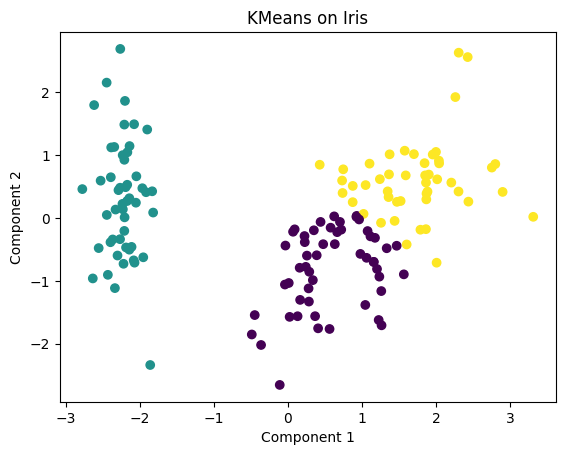


Results for DBSCAN on Iris:
Silhouette Score: 0.5245
Davies-Bouldin Score: 5.5321
Adjusted Rand Index: 0.5233
Normalized Mutual Information: 0.6152


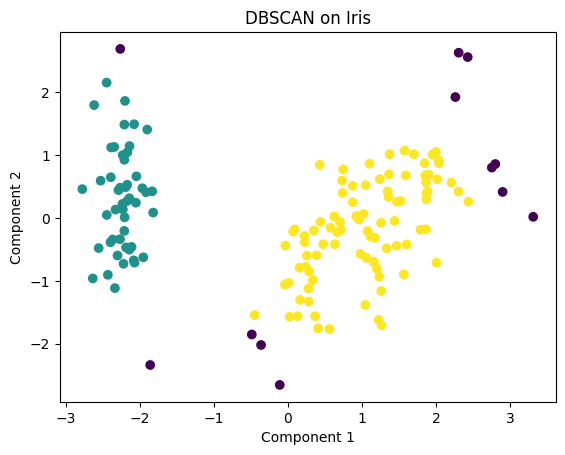


Results for Agglomerative on Iris:
Silhouette Score: 0.5111
Davies-Bouldin Score: 0.7054
Adjusted Rand Index: 0.5861
Normalized Mutual Information: 0.6427


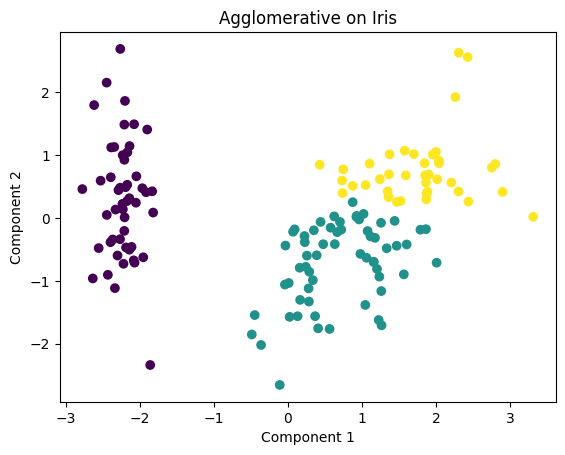


Results for GMM on Iris:
Silhouette Score: 0.4677
Davies-Bouldin Score: 0.8233
Adjusted Rand Index: 0.5149
Normalized Mutual Information: 0.6854


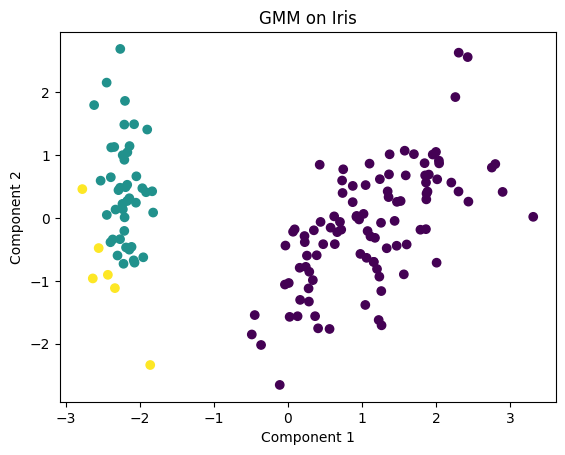


Results for Spectral on Iris:
Silhouette Score: 0.5123
Davies-Bouldin Score: 0.7033
Adjusted Rand Index: 0.5903
Normalized Mutual Information: 0.6267


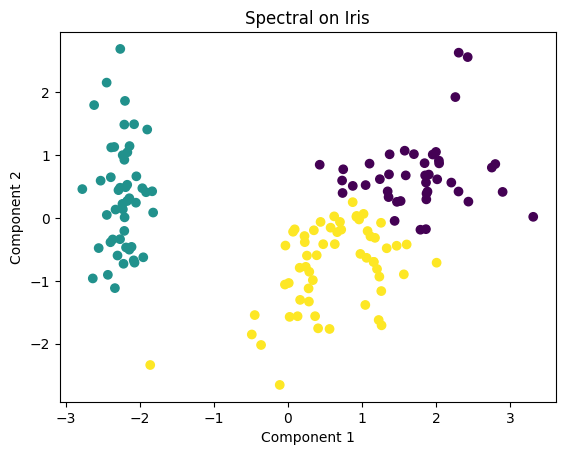


Results for FEMaClustering on Iris:
Silhouette Score: 0.1569
Davies-Bouldin Score: 0.5159
Adjusted Rand Index: 0.5448
Normalized Mutual Information: 0.6710


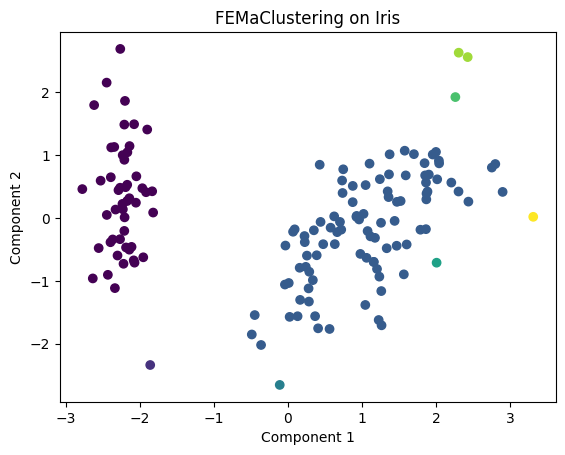


Processing Wine dataset
INFO: (178, 13)
FEMaClustering... ...


/home/danillorp/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/danillorp/Área de Trabalho/github/fema/src/fema_clustering.py:64: RuntimeWarning: divide by zero encountered in divide
  self.weight_matrix[ind, :] = 1.0 / (dist ** self.z)
/home/danillorp/Área de Trabalho/github/fema/src/fema_clustering.py:65: RuntimeWarning: invalid value encountered in divide
  self.weight_matrix[ind, :] /= np.sum(self.weight_matrix[ind, :] + 1e-20)



Results for KMeans on Wine:
Silhouette Score: 0.5611
Davies-Bouldin Score: 0.5973
Adjusted Rand Index: 0.8951
Normalized Mutual Information: 0.8821


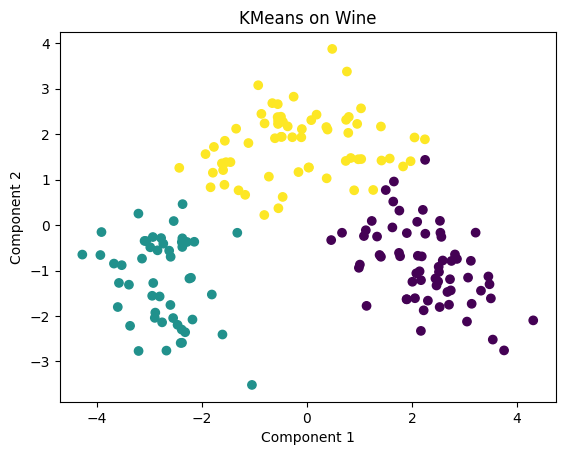


Results for DBSCAN on Wine:
Silhouette Score: 0.3230
Davies-Bouldin Score: 1.3883
Adjusted Rand Index: 0.3790
Normalized Mutual Information: 0.4999


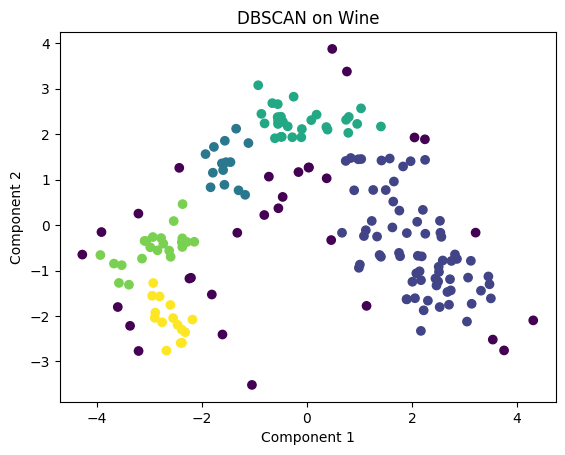


Results for Agglomerative on Wine:
Silhouette Score: 0.5591
Davies-Bouldin Score: 0.6013
Adjusted Rand Index: 0.8961
Normalized Mutual Information: 0.8583


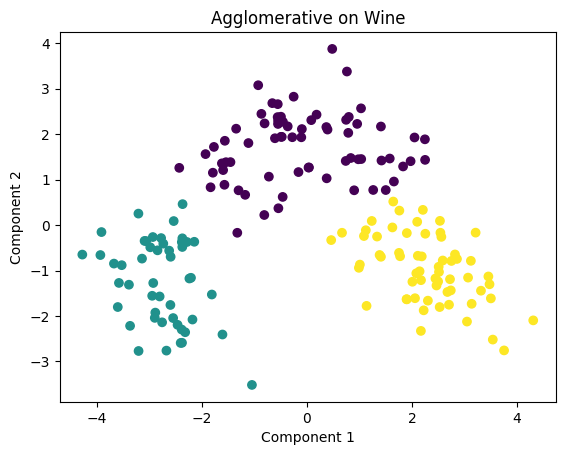


Results for GMM on Wine:
Silhouette Score: 0.5591
Davies-Bouldin Score: 0.6019
Adjusted Rand Index: 0.9135
Normalized Mutual Information: 0.8848


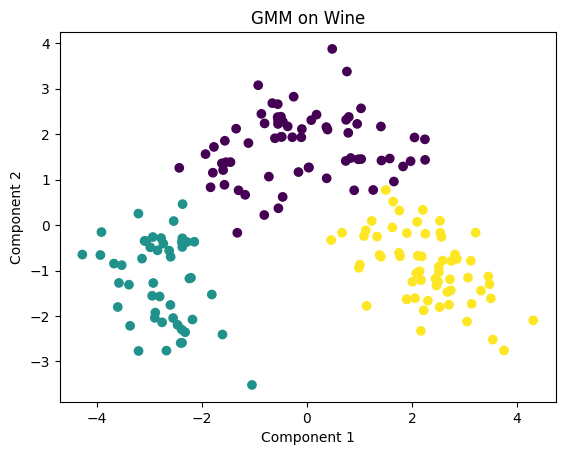


Results for Spectral on Wine:
Silhouette Score: 0.5591
Davies-Bouldin Score: 0.6013
Adjusted Rand Index: 0.8961
Normalized Mutual Information: 0.8583


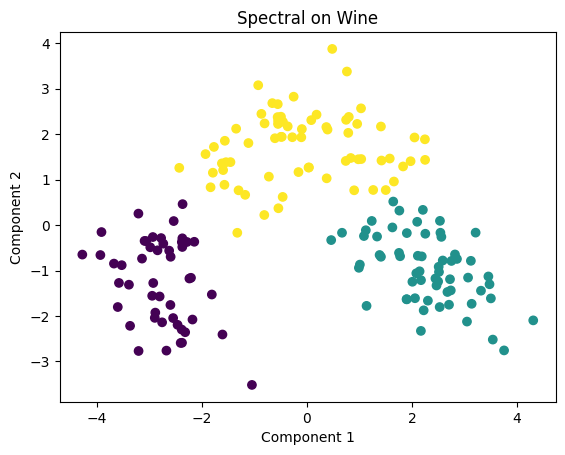


Results for FEMaClustering on Wine:
Silhouette Score: -0.0861
Davies-Bouldin Score: 0.6706
Adjusted Rand Index: -0.0032
Normalized Mutual Information: 0.0375


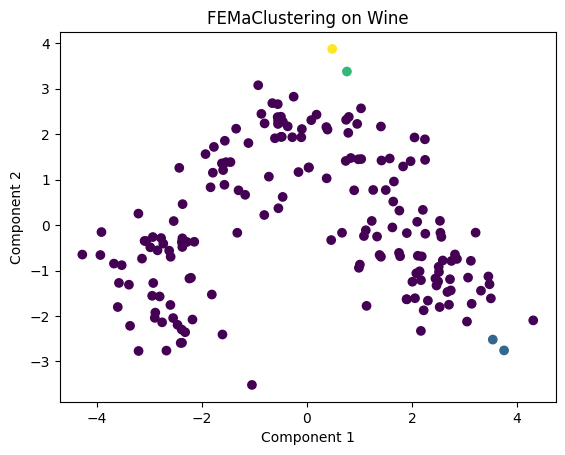


Processing Digits dataset
INFO: (1797, 64)


/home/danillorp/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


FEMaClustering... ...


/home/danillorp/Área de Trabalho/github/fema/src/fema_clustering.py:64: RuntimeWarning: divide by zero encountered in divide
  self.weight_matrix[ind, :] = 1.0 / (dist ** self.z)
/home/danillorp/Área de Trabalho/github/fema/src/fema_clustering.py:65: RuntimeWarning: invalid value encountered in divide
  self.weight_matrix[ind, :] /= np.sum(self.weight_matrix[ind, :] + 1e-20)


In [4]:
preprocess_data_flag = True

# Função principal para executar o experimento
def main():
    datasets = load_datasets()
    
    results = {}
    
    for dataset_name, (data, target) in datasets.items():
        print(f"\nProcessing {dataset_name} dataset")
        print('INFO:',data.shape)
        
        if dataset_name in ['20 Newsgroups']:
            # Para o conjunto de dados 20 Newsgroups, a vetorização do texto é necessária
            from sklearn.feature_extraction.text import TfidfVectorizer
            vectorizer = TfidfVectorizer(max_features=1000)
            data = vectorizer.fit_transform(data).toarray()
        
        if preprocess_data_flag:
            data_preprocessed = preprocess_data(data)
        else:   
            data_preprocessed = data.copy()

        clusters = apply_clustering_methods(data_preprocessed)
        
        for method_name, labels_pred in clusters.items():
            metrics = calculate_metrics(data_preprocessed, target, labels_pred)
            results[(dataset_name, method_name)] = metrics
            

            print(f"\nResults for {method_name} on {dataset_name}:")
            for metric_name, metric_value in metrics.items():
                print(f"{metric_name}: {metric_value:.4f}")

            plt.figure()  # Cria uma nova figura para cada método
            plt.scatter(data_preprocessed[:, 0], data_preprocessed[:, 1], c=labels_pred)  # Plotar dados com cores de cluster
            plt.title(f"{method_name} on {dataset_name}")
            plt.xlabel("Component 1")
            plt.ylabel("Component 2")
            plt.show()  # Exibe o gráfico na tela
            #plt.savefig(f"{dataset_name}_{method_name}.png")
if __name__ == "__main__":
    main()

"""Para o Silhouette Score e Davies-Bouldin Score, quanto maior o valor, melhor é o agrupamento.
Para o ARI e NMI, quanto mais próximo de 1, melhor é a concordância entre os agrupamentos e os rótulos verdadeiros."""